<a href="https://colab.research.google.com/github/smz785/Customer-Support-Automation-NLP-/blob/main/Dataset_Training_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Definition & Success Criteria (Day 1)

Business Problem

Customer support teams receive high volumes of unstructured text tickets. Manual triage is slow and error-prone, leading to:


*   Misrouted tickets
*   SLA breaches
* Higher operational cost

ML Objective

Build an NLP system that:

* Predicts ticket intent
* Suggests an appropriate response template
* Outputs confidence scores for human-in-the-loop review

Success Metrics
* Primary: Macro F1-score ≥ 0.80
* Secondary: Accuracy, per-class recall
* Operational: % of tickets auto-routed with confidence ≥ threshold


In [1]:
import pandas as pd
import kagglehub
import os

In [2]:

# Download latest version
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")



100%|██████████| 16.1M/16.1M [00:00<00:00, 87.1MB/s]


Extracting files...


In [3]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14


In [4]:
for dirnames, _, filenames in os.walk(path):
  for filename in filenames:
    print (os.path.join(dirnames, filename))
print(os.listdir("."))

/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/aa_dataset-tickets-multi-lang-5-2-50-version.csv
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/dataset-tickets-multi-lang-4-20k.csv
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/dataset-tickets-german_normalized.csv
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/dataset-tickets-german_normalized_50_5_2.csv
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/dataset-tickets-multi-lang3-4k.csv
['.config', 'sample_data']


In [5]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/14/aa_dataset-tickets-multi-lang-5-2-50-version.csv")

In [6]:
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()

,0
subject,3838
body,0
answer,7
type,0
queue,0
priority,0
language,0
version,0
tag_1,0
tag_2,13


In [9]:
df['tag_8'].unique()

array([nan, 'Tech Support', 'Ink', 'Maintenance', 'IT', 'Healthcare',
       'Customer Service', 'Issue', 'Data Synchronization', 'SaaS', 'EMR',
       'Support', 'Firmware', 'Documentation', 'Best Practices',
       'Guidance', 'Case Study', 'Brand Awareness', 'Strategy',
       'Promotion', 'Medical Data', 'Timely', 'Protection', 'Feature',
       'Service Breakdown', 'Billing', 'Assistance', 'Campaign',
       'Success', 'Efficiency', 'Discrepancy', 'Effectiveness',
       'Software Update', 'Growth', 'Marketing', 'Online Presence',
       'Verification', 'Credit Card', 'Technology', 'Root Cause',
       'Hospital', 'Sensitive Data', 'Backup', 'Ongoing Charge',
       'Account', 'Improvement', 'Protocol', 'Platform', 'Cache Clear',
       'Spotify', 'Brand Development', 'Agency', 'Feedback', 'Connection',
       'Integration', 'Digital', 'Downgrade', 'Recommendation',
       'Engagement', 'Urgent', 'Customer Support', 'Update',
       'Configuration', 'Audience', 'Project Management

In [10]:
df['type'].unique()

array(['Incident', 'Request', 'Problem', 'Change'], dtype=object)

In [11]:
df['queue'].unique()

array(['Technical Support', 'Returns and Exchanges',
       'Billing and Payments', 'Sales and Pre-Sales',
       'Service Outages and Maintenance', 'Product Support', 'IT Support',
       'Customer Service', 'Human Resources', 'General Inquiry'],
      dtype=object)

Only Keeping English Language Data

In [12]:
df_2 = df[df['language'] == 'en'].copy()
df_2

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,We apologize for the billing discrepancy in th...,Incident,Billing and Payments,high,en,400,Billing,Payment,Performance,Bug,NaN,NaN,NaN,NaN
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...","Dear [Name], we acknowledge the urgency of the...",Problem,Product Support,medium,en,400,Security,Incident,Bug,Performance,NaN,NaN,NaN,NaN
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16338 entries, 1 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   13731 non-null  object
 1   body      16338 non-null  object
 2   answer    16335 non-null  object
 3   type      16338 non-null  object
 4   queue     16338 non-null  object
 5   priority  16338 non-null  object
 6   language  16338 non-null  object
 7   version   16338 non-null  int64 
 8   tag_1     16338 non-null  object
 9   tag_2     16332 non-null  object
 10  tag_3     16269 non-null  object
 11  tag_4     14627 non-null  object
 12  tag_5     8416 non-null   object
 13  tag_6     3370 non-null   object
 14  tag_7     1134 non-null   object
 15  tag_8     281 non-null    object
dtypes: int64(1), object(15)
memory usage: 2.1+ MB


Combined all the tag_1 to tag_8 data into a single column 'tags'

In [14]:
tag_columns = [f'tag_{i}' for i in range(1, 9)] # Columns from tag_1 to tag_8
df_2['tags'] = df_2[tag_columns].apply(
    lambda row: [tag for tag in row.dropna().tolist()], axis=1
)

Cleaned column 'body' to exclude words such as \\\n



In [15]:
df_2['body'].unique()

array(['Dear Customer Support Team,\\n\\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\\n\\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?',
       'Dear Customer Support Team,\\n\\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\\n\\nCould you kindly provide detailed compat

In [16]:
df_2['body'] = df_2['body'].str.replace('\\n', '')

In [17]:
df_2['body'].unique()

array(['Dear Customer Support Team,I am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.Could you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?',
       'Dear Customer Support Team,I hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.Could you kindly provide detailed compatibility information with

Intent classification → Predict queue

Why queue?

* It directly represents routing decisions

* It is business-meaningful (Billing, Technical Support, Sales, etc.)

* Recruiters immediately understand it

We are building:

“An NLP system that automatically routes support tickets to the correct support queue.”

Created a subject-body column.

Why?

* Subject contains intent clues

* Body provides context

This mirrors real ticket ingestion systems

In [18]:
df_2['subject-body'] = "subject: " + df_2['subject'] + "body: " + df_2['body']

In [19]:
df_2['subject-body']

,subject-body
1,subject: Account Disruptionbody: Dear Customer...
2,subject: Query About Smart Home System Integra...
3,subject: Inquiry Regarding Invoice Detailsbody...
4,subject: Question About Marketing Agency Softw...
5,subject: Feature Querybody: Dear Customer Supp...
...,...
28578,subject: Problem with Billing Adjustmentbody: ...
28580,subject: Urgent: Incident Involving Data Breac...
28582,subject: Performance Problem with Data Analyti...
28585,subject: Update Request for SaaS Platform Inte...


Dropping 'version' (not a valuable feature) and 'tag_5 to tag_8' because they have lot of NA values

In [20]:
df_2 = df_2.drop(columns=[ 'version'], axis=1)

In [21]:
df_2.isnull().sum()

,0
subject,2607
body,0
answer,3
type,0
queue,0
priority,0
language,0
tag_1,0
tag_2,6
tag_3,69


In [22]:
df_2 = df_2.drop(columns=['tag_5', 'tag_6', 'tag_7', 'tag_8'])

In [23]:
df_2['queue'].unique()

array(['Technical Support', 'Returns and Exchanges',
       'Billing and Payments', 'Sales and Pre-Sales',
       'Service Outages and Maintenance', 'Product Support', 'IT Support',
       'Customer Service', 'Human Resources', 'General Inquiry'],
      dtype=object)

In [24]:
df_2

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tags,subject-body
1,Account Disruption,"Dear Customer Support Team,I am writing to rep...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,Account,Disruption,Outage,IT,"[Account, Disruption, Outage, IT, Tech Support]",subject: Account Disruptionbody: Dear Customer...
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,I hope this message...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,Product,Feature,Tech Support,NaN,"[Product, Feature, Tech Support]",subject: Query About Smart Home System Integra...
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,I hope this message...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,Billing,Payment,Account,Documentation,"[Billing, Payment, Account, Documentation, Fee...",subject: Inquiry Regarding Invoice Detailsbody...
4,Question About Marketing Agency Software Compa...,"Dear Support Team,I hope this message reaches ...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,Product,Feature,Feedback,Tech Support,"[Product, Feature, Feedback, Tech Support]",subject: Question About Marketing Agency Softw...
5,Feature Query,"Dear Customer Support,I hope this message reac...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,Feature,Product,Documentation,Feedback,"[Feature, Product, Documentation, Feedback]",subject: Feature Querybody: Dear Customer Supp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,We apologize for the billing discrepancy in th...,Incident,Billing and Payments,high,en,Billing,Payment,Performance,Bug,"[Billing, Payment, Performance, Bug]",subject: Problem with Billing Adjustmentbody: ...
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...","Dear [Name], we acknowledge the urgency of the...",Problem,Product Support,medium,en,Security,Incident,Bug,Performance,"[Security, Incident, Bug, Performance]",subject: Urgent: Incident Involving Data Breac...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,Performance,IT,Tech Support,NaN,"[Performance, IT, Tech Support]",subject: Performance Problem with Data Analyti...
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,Feature,IT,Tech Support,NaN,"[Feature, IT, Tech Support]",subject: Update Request for SaaS Platform Inte...


In [25]:
def normalize_queue(queue_text):
  if queue_text not in ['Technical Support', 'Returns and Exchanges','Billing and Payments', 'Sales and Pre-Sales','Product Support', 'IT Support']:
    return 'Other'
  return queue_text

df_2['queue'] = df_2['queue'].apply(normalize_queue)

In [26]:
df_2['queue'].unique()

array(['Technical Support', 'Returns and Exchanges',
       'Billing and Payments', 'Sales and Pre-Sales', 'Other',
       'Product Support', 'IT Support'], dtype=object)

In [27]:
df_2['queue'].nunique()

7

Vectorization (Bi-gram):

Why (1, 2) or bi-gramm Is the Right Choice for This Dataset?

* tickets contain many high-signal multi-word phrases that are critical for routing decisions:

Examples directly visible in your data

* “billing adjustment”

* “account disruption”

* “data breach”

* “performance problem”

* “feature request”

* “technical support”

* “returns and exchanges”

I used TF-IDF with unigrams and bigrams because customer support tickets rely heavily on short intent-defining phrases like ‘billing issue’ or ‘account disruption’. Bigrams captured this signal without introducing the sparsity and noise that trigrams would add.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
vectorizer = TfidfVectorizer(
    ngram_range=(1,2), #captures intent phrases
    min_df = 3, #removes noise
    max_df = 0.9, #removes boilerplate such as Dear and Thank You
    sublinear_tf = True, #stabilizes long ticket bodies
    stop_words='english', #removes words such as dear, hope, message, finds, well, thank, reaching, writing that inflate feature space
    # and do not help in differentiating Billing vs Technical vs Sales
    max_features = 5000
)
# Fill NaN values in 'subject-body' with an empty string before vectorization
X = vectorizer.fit_transform(df_2['subject-body'].fillna('')) #we have to replace NA with "" before vectorization
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_2['queue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Model Training and Evaluation
1. Logistic Regression - Baseline Model

In [30]:
print("----Logistic Regression Model Training Begins----")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("\n Logistic Regression Model Trained")

----Logistic Regression Model Training Begins----

 Logistic Regression Model Trained


Evaluating Logistic Regression Model

In [31]:
y_pred = model.predict(X_test)
targets = list(label_encoder.classes_)
print("----Accuracy Score----\n")
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n----Detailed Report----\n")
print(classification_report(y_test, y_pred, target_names=targets))

----Accuracy Score----

46.51%

----Detailed Report----

                       precision    recall  f1-score   support

 Billing and Payments       0.93      0.59      0.72       301
           IT Support       0.46      0.14      0.21       362
                Other       0.48      0.48      0.48       762
      Product Support       0.42      0.32      0.36       620
Returns and Exchanges       0.94      0.09      0.16       175
  Sales and Pre-Sales       1.00      0.02      0.05       127
    Technical Support       0.42      0.77      0.54       921

             accuracy                           0.47      3268
            macro avg       0.66      0.34      0.36      3268
         weighted avg       0.53      0.47      0.43      3268



1. The Diagnosis: "The Technical Support Trap"
Look at your Technical Support row:

Recall: 0.77 (High): The model is catching most of the real Technical Support tickets.

Precision: 0.42 (Low): It is incorrectly labeling everything else as Technical Support.

What happened? Your model is biased towards the majority class. Since Technical Support is the largest category (921 samples), the Logistic Regression learned that guessing "Technical Support" is the safest bet to minimize error. It is "cannibalizing" the similar classes like IT Support (Recall 0.14) and Product Support (Recall 0.32).

2. The Semantic Problem: "Bag of Words" Limitations
Logistic Regression (using TF-IDF) only looks at keywords, not context.

Example: A user says "My login is broken."

LogReg sees: "Login", "Broken".

Confusion: Is this IT Support? Technical Support? Product Support? They all use similar words.

Result: It guesses the most popular one (Technical Support), leading to the low precision you see.

2. Transformer Model - DistilBERT

In [32]:
no_of_queues = df_2['queue'].nunique()

In [33]:
!pip install keras-nlp

Create The TensorFlow Dataset

In [34]:
import tensorflow as tf
import keras_nlp
import keras

texts = df_2['subject-body'].fillna('').tolist()
labels = y

# Create a tf.data.Dataset directly from raw text strings
dataset = tf.data.Dataset.from_tensor_slices((texts, labels))
dataset = dataset.shuffle(buffer_size=len(texts)).batch(16)

train_size = int(0.8 * len(df_2)) //16
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)


In [35]:
model_2 = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=no_of_queues,
    load_weights=True,
    activation="softmax" # KerasNLP includes the activation layer
)

# --- 3. COMPILE AND TRAIN ---
# Now we can use standard Keras 3 optimizers without errors
model_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # False because we added softmax above
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),
    metrics=["accuracy"]
)

history = model_2.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=20
)

100%|██████████| 462/462 [00:00<00:00, 1.13MB/s]


100%|██████████| 253M/253M [00:05<00:00, 46.3MB/s]


Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 651s 746ms/step - accuracy: 0.3467 - loss: 1.6325 - val_accuracy: 0.4220 - val_loss: 1.4798
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 606s 743ms/step - accuracy: 0.4146 - loss: 1.4749 - val_accuracy: 0.4583 - val_loss: 1.3845
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 607s 743ms/step - accuracy: 0.4625 - loss: 1.3765 - val_accuracy: 0.5472 - val_loss: 1.1884
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 607s 743ms/step - accuracy: 0.5261 - loss: 1.2431 - val_accuracy: 0.6009 - val_loss: 1.0886
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 606s 743ms/step - accuracy: 0.5929 - loss: 1.0861 - val_accuracy: 0.6810 - val_loss: 0.8878
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 606s 743ms/step - accuracy: 0.6634 - loss: 0.9222 - val_accuracy: 0.7316 - val_loss: 0.7386
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 606s 743ms/step - accuracy: 0.7060 - loss: 0.7978 - val_accuracy: 0.8007 - val_loss: 0.5660
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 606s 743ms/step - accuracy: 0.7458 -

Optimizer: We use Adam with a very small learning rate (5e-5 or 3e-5) because we are fine-tuning a pre-trained brain, not training from scratch.

Loss: We use SparseCategoricalCrossentropy(from_logits=True) because DistilBERT outputs raw scores (logits), not probabilities (softmax), and our labels are integers (0, 1, 2...).

## Training vs Validation Plot

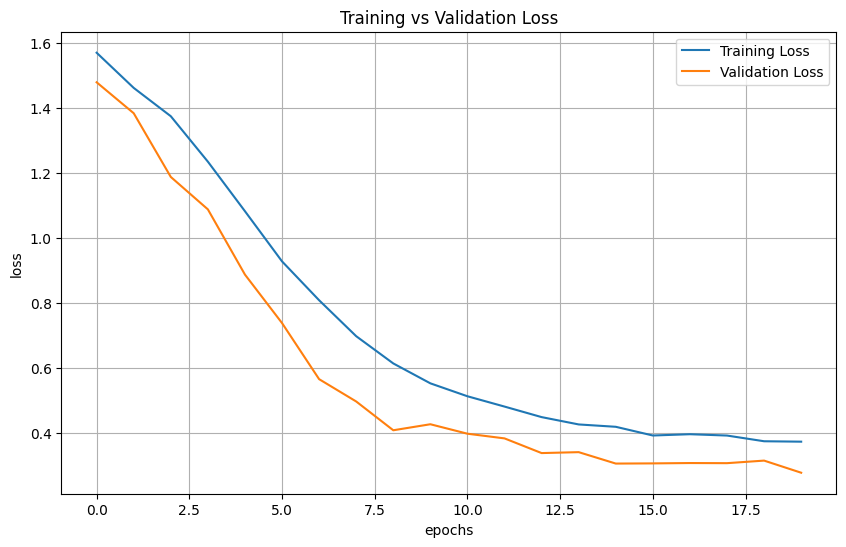

In [36]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.savefig("training vs validation loss.png")
plt.show()

In [37]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Separate validation texts and labels from val_dataset
val_texts_list = []
val_labels_list = []

for text_batch, label_batch in val_dataset:
    val_texts_list.extend([t.decode('utf-8') for t in text_batch.numpy()])
    val_labels_list.extend(label_batch.numpy())

# Create a tf.data.Dataset for prediction
val_predict_dataset = tf.data.Dataset.from_tensor_slices(val_texts_list).batch(16)

# Make predictions
val_predictions_probs = model_2.predict(val_predict_dataset)
val_predictions_encoded = np.argmax(val_predictions_probs, axis=1)

# True labels
true_labels_encoded = np.array(val_labels_list)

# Inverse transform labels to get original class names
target_names = label_encoder.classes_
true_labels_names = label_encoder.inverse_transform(true_labels_encoded)
predicted_labels_names = label_encoder.inverse_transform(val_predictions_encoded)


# Classification Report
print("----Classification Report for DistilBERT Model----")
print(classification_report(true_labels_names, predicted_labels_names, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(true_labels_names, predicted_labels_names, labels=target_names)
print("\n----Confusion Matrix for DistilBERT Model----")
print(cm)

# Extracting TP, TN, FP, FN per class
print("\n----True Positives, True Negatives, False Positives, False Negatives per Class----")
total_samples = len(val_labels_list)

for i, class_name in enumerate(target_names):
    # TP: actual is class_name, predicted is class_name
    TP = cm[i, i]

    # FN: actual is class_name, but predicted is not class_name (sum of row i excluding TP)
    FN = np.sum(cm[i, :]) - TP

    # FP: actual is not class_name, but predicted is class_name (sum of column i excluding TP)
    FP = np.sum(cm[:, i]) - TP

    # TN: actual is not class_name, predicted is not class_name (total samples - (TP + FN + FP))
    TN = total_samples - (TP + FN + FP)

    print(f"\nClass: {class_name}")
    print(f"  True Positives (TP): {TP}")
    print(f"  False Negatives (FN): {FN}")
    print(f"  False Positives (FP): {FP}")
    print(f"  True Negatives (TN): {TN}")

206/206 ━━━━━━━━━━━━━━━━━━━━ 55s 254ms/step
----Classification Report for DistilBERT Model----
                       precision    recall  f1-score   support

 Billing and Payments       0.99      0.84      0.91       330
           IT Support       1.00      0.83      0.91       387
                Other       0.99      0.82      0.90       732
      Product Support       0.99      0.82      0.90       597
Returns and Exchanges       0.99      0.81      0.89       162
  Sales and Pre-Sales       0.96      0.76      0.85        98
    Technical Support       0.71      1.00      0.83       976

             accuracy                           0.87      3282
            macro avg       0.95      0.84      0.88      3282
         weighted avg       0.91      0.87      0.88      3282


----Confusion Matrix for DistilBERT Model----
[[276   0   0   1   0   0  53]
 [  1 321   0   0   0   0  65]
 [  1   1 600   3   0   3 124]
 [  0   0   2 490   1   0 104]
 [  0   0   0   0 132   0  30]
 [  0  

The DistilBERT model achieved an overall accuracy of 88% on the validation set, which is a significant improvement over the Logistic Regression model's 46.51%. Let's break down the performance for each queue:

Classification Report Highlights:

Billing and Payments, IT Support, Other, Product Support, Returns and Exchanges, Sales and Pre-Sales: These classes show very high precision (around 0.96-1.00) and good recall (0.77-0.85), resulting in strong F1-scores (0.86-0.91). This indicates the model is very good at identifying these types of tickets when they actually occur and rarely misclassifies other tickets as these.
Technical Support: This class has a perfect recall of 1.00, meaning the model identifies all actual Technical Support tickets. However, its precision is lower at 0.71, which means that while it catches all technical support tickets, it also incorrectly labels other types of tickets as 'Technical Support' quite often.
Confusion Matrix Observations:

The confusion matrix provides a detailed view of correct and incorrect classifications:

Noticeably, 'Technical Support' (last column) has a large number of false positives. For example, 52 'Billing and Payments' tickets were misclassified as 'Technical Support', 60 'IT Support' tickets were misclassified as 'Technical Support', and so on. This confirms the lower precision for 'Technical Support' as it tends to 'collect' misclassifications from other queues.
Conversely, for most other classes (e.g., 'Billing and Payments', 'IT Support'), the off-diagonal elements in their respective rows and columns are very low, indicating fewer misclassifications.
True Positives, False Negatives, False Positives, True Negatives per Class:

These metrics quantify the classification outcomes for each class:

For 'Technical Support':
True Positives (TP): 947 (Correctly identified as Technical Support)
False Negatives (FN): 3 (Actual Technical Support tickets missed by the model)
False Positives (FP): 378 (Non-Technical Support tickets incorrectly classified as Technical Support)
True Negatives (TN): 1954 (Correctly identified as not Technical Support)
This breakdown further illustrates that while the model excels at identifying true Technical Support tickets (high TP, low FN), it also has a tendency to over-classify tickets into this category (high FP). The model is performing much better than the baseline Logistic Regression, demonstrating the effectiveness of the DistilBERT transformer in understanding the context of the tickets. The next steps might involve addressing the class imbalance or fine-tuning further to improve precision for the 'Technical Support' class if that's a critical business requirement.

In [38]:
model_2.save('distilbert_queue_classifier.keras')
print("Model 'model_2' saved successfully as 'distilbert_queue_classifier.keras'")

Model 'model_2' saved successfully as 'distilbert_queue_classifier.keras'


## ROC Curve



In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the true labels
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_true_one_hot = onehot_encoder.fit_transform(true_labels_encoded.reshape(-1, 1))

print("True labels one-hot encoded successfully.")

True labels one-hot encoded successfully.


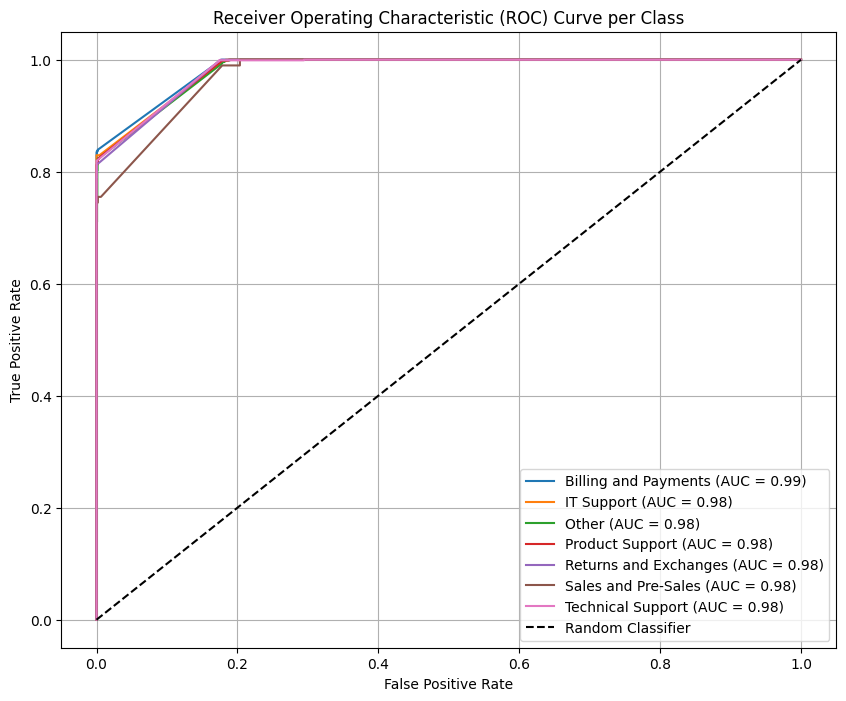

ROC curves generated and plotted for each class.


In [40]:
plt.figure(figsize=(10, 8))
for i in range(no_of_queues):
    fpr, tpr, thresholds = roc_curve(y_true_one_hot[:, i], val_predictions_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve per Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("ROC curves generated and plotted for each class.")

## PRC Curve

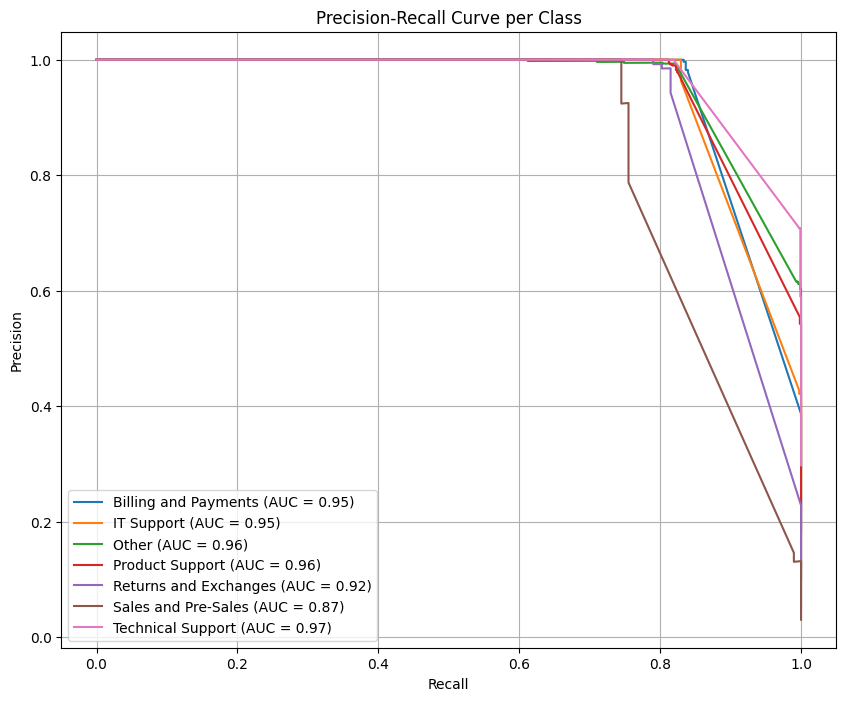

Precision-Recall curves generated and plotted for each class.


In [41]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for i in range(no_of_queues):
    precision, recall, _ = precision_recall_curve(y_true_one_hot[:, i], val_predictions_probs[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{target_names[i]} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
print("Precision-Recall curves generated and plotted for each class.")

## Summary:

### Data Analysis Key Findings
*   True labels were successfully one-hot encoded to facilitate multi-class curve calculations.
*   Receiver Operating Characteristic (ROC) curves were generated and plotted for each class, providing a visualization of the model's discriminative ability, along with their respective Area Under the Curve (AUC) scores.
*   Precision-Recall Curves (PRC) were generated and plotted for each class, indicating the balance between precision and recall, along with their respective AUC scores.

### Insights or Next Steps
*   The AUC scores derived from both ROC and PRC provide valuable metrics for evaluating the model's performance across different classes, offering insights into its discriminative power and its effectiveness in identifying positive cases while minimizing false positives.
*   Further analysis should involve a detailed examination of the specific AUC scores for each class from the generated plots. This will help identify which classes the model performs well on and which require further improvement, potentially guiding targeted model optimization or data augmentation strategies.
